In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

In [3]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [6]:
import requests
from bs4 import BeautifulSoup
import csv
def extract_articles_from_page(page_number):
    url = f"https://markets.businessinsider.com/news/amzn-stock?p={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = []
    for article in soup.find_all('div', class_='latest-news__story'):
        title_tag = article.find('a', class_='news-link')
        date_tag = article.find('time', class_='latest-news__date')

        if title_tag and date_tag:
            title = title_tag.get_text(strip=True)
            date = date_tag.get_text(strip=True)
            articles.append((date, title))

    return articles

all_articles = []
for page in range(1, 150):
    print(f"Scraping page {page}")
    articles = extract_articles_from_page(page)
    all_articles.extend(articles)

# Write the data to a CSV file
with open('market_amazone_news_articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'Title'])
    # Write the articles
    for article in all_articles:
        writer.writerow(article)

print("Data has been written to market_amazon_news_articles.csv")


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

In [7]:
import csv
from datetime import datetime, timedelta

def convert_relative_time_to_date(relative_time):
    now = datetime.now()
    if 'h' in relative_time:
        hours_ago = int(relative_time.replace('h', ''))
        return (now - timedelta(hours=hours_ago)).strftime('%Y-%m-%d')
    elif 'd' in relative_time:
        # Handling comma-separated numbers in days
        days_ago = int(relative_time.replace('d', '').replace(',', ''))
        return (now - timedelta(days=days_ago)).strftime('%Y-%m-%d')
    else:
        return relative_time  # If the date is already in the correct format

def process_csv(file_name):
    with open(file_name, mode='r', newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        rows = list(reader)

    headers = rows[0]  # Assuming the first row is the header
    data_rows = rows[1:]  # The rest are the data rows

    for row in data_rows:
        row[0] = convert_relative_time_to_date(row[0])  # Assuming the date is in the first column

    with open(file_name, mode='w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(headers)  # Write the header row
        writer.writerows(data_rows)  # Write the updated data rows

# File path
file_name = '/content/market_amazone_news_articles.csv'

# Process the CSV file
process_csv(file_name)

print("Data in the file has been updated")


Data in the file has been updated


In [8]:
import pandas as pd

def merge_titles_by_date(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Group by the date and join the titles
    merged_df = df.groupby('Date')['Title'].apply(' '.join).reset_index()

    # Save the resulting DataFrame back to the original CSV file
    merged_df.to_csv(file_path, index=False)

    print(f'Merged titles have been saved to {file_path}')

# Example usage
file_path = '/content/market_amazone_news_articles.csv'
merge_titles_by_date(file_path)

Merged titles have been saved to /content/market_amazone_news_articles.csv


In [9]:
import yfinance as yf


In [10]:
AMZN= yf.Ticker("AMZN")

In [11]:
AMZN.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-13 00:00:00-04:00,188.000000,188.309998,185.360001,186.570007,24898600,0.0,0.0
2024-05-14 00:00:00-04:00,183.820007,187.720001,183.449997,187.070007,38698200,0.0,0.0
2024-05-15 00:00:00-04:00,185.970001,186.720001,182.729996,185.990005,75459900,0.0,0.0
2024-05-16 00:00:00-04:00,185.600006,187.309998,183.460007,183.630005,38834500,0.0,0.0
2024-05-17 00:00:00-04:00,183.759995,185.300003,183.350006,184.699997,33175700,0.0,0.0
2024-05-20 00:00:00-04:00,184.339996,186.669998,183.279999,183.539993,30511800,0.0,0.0
2024-05-21 00:00:00-04:00,182.300003,183.259995,180.750000,183.149994,50839100,0.0,0.0
2024-05-22 00:00:00-04:00,183.880005,185.220001,181.970001,183.130005,28148800,0.0,0.0
2024-05-23 00:00:00-04:00,183.660004,184.759995,180.080002,181.050003,33670200,0.0,0.0


In [12]:
import yfinance as yf
from datetime import datetime, timedelta

# Set the end date to today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Set the start date to 10/11/2019
start_date = '2022-12-04'

# Get historical stock data for AMZN from start_date to end_date
data = yf.download('AMZN', start=start_date, end=end_date)

# Save the data to a CSV file
output_file = 'amazon_stock.csv'
data.to_csv(output_file)

print(f"Data saved to {output_file}")


[*********************100%%**********************]  1 of 1 completed

Data saved to amazon_stock.csv


In [13]:
import pandas as pd

# Provide the paths of CSV files in Google Colab
file1_path = '/content/market_amazone_news_articles.csv'
file2_path = '/content/amazon_stock.csv'

# Load data from both files
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)

# Convert 'Date' column to datetime format
data1['Date'] = pd.to_datetime(data1['Date'])
data2['Date'] = pd.to_datetime(data2['Date'])

# Initialize an empty list to store labels
labels = []

# Iterate through dates in file1 and find next day's closing price in file2
for date in data1['Date']:
    # Find the index of the current date in file2
    idx = data2[data2['Date'] == date].index
    if len(idx) > 0 and idx[0] < len(data2) - 1:
        next_day_close = data2.loc[idx[0] + 1, 'Close']
        today_close = data2.loc[idx[0], 'Close']
        # Label 1 if next day's price is higher, otherwise 0
        label = 1 if next_day_close > today_close else 0
    else:
        # If next day's data is not available, assign label as -1
        label = -1
    labels.append(label)

# Add 'Label' column to file1
data1['Label'] = labels

# Save the updated data to the same file
data1.to_csv(file1_path, index=False)

print("Labels added to file1.csv.")


Labels added to file1.csv.


In [15]:
import pandas as pd

# Provide the path of the CSV file containing the 'Label' column
file_path = '/content/market_amazone_news_articles.csv'

# Load data from the file
data = pd.read_csv(file_path)

# Remove rows where 'Label' column contains -1
data = data[data['Label'] != -1]

# Save the updated data to the same file
data.to_csv(file_path, index=False)

print("Rows with Label -1 removed from the file.")


Rows with Label -1 removed from the file.


In [16]:
df = pd.read_csv("/content/market_amazone_news_articles.csv")

In [17]:
df.shape

(379, 3)

In [20]:
new_df = df[['Title', 'Label']]

In [ ]:
new_df.head()

In [ ]:
import seaborn as sns
sns.countplot(x='Label', data=new_df)

In [26]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import re
import nltk
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)


class CustomPreprocess():
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()

        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)

        return sentence

In [29]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [30]:
X = []
sentences = list(new_df['Title'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [31]:
y=new_df['Label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

In [33]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [34]:
import io
import json

In [35]:
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [36]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

4411

In [37]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [39]:
import os
import requests
import zipfile

# URL and file paths
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"
glove_extract_path = "."
required_file = "glove.6B.100d.txt"

# Download the GloVe zip file if it does not exist
if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url)
    with open(glove_zip_path, 'wb') as f:
        f.write(response.content)
    print("Download complete.")

# Extract only the required file from the zip
with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    if required_file not in zip_ref.namelist():
        print(f"{required_file} not found in the zip file.")
    else:
        print(f"Extracting {required_file}...")
        zip_ref.extract(required_file, glove_extract_path)
        print("Extraction complete.")

# Optionally, delete the zip file to save space
if os.path.exists(glove_zip_path):
    os.remove(glove_zip_path)
    print(f"Deleted the zip file: {glove_zip_path}")

# Load the GloVe embeddings
embeddings_dictionary = dict()
with open(required_file, encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

print(f"Loaded {len(embeddings_dictionary)} word vectors.")


Download complete.
Extracting glove.6B.100d.txt...
Extraction complete.
Deleted the zip file: glove.6B.zip
Loaded 400000 word vectors.


In [40]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [41]:
embedding_matrix.shape

(4411, 100)

In [42]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [43]:
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          441100    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 451101 (1.72 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 441100 (1.68 MB)
_________________________________________________________________
None


In [44]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
2/2 [==============================] - 1s 257ms/step - loss: 0.7145 - acc: 0.5661 - val_loss: 0.7493 - val_acc: 0.5082
Epoch 2/6
2/2 [==============================] - 0s 53ms/step - loss: 0.5651 - acc: 0.7314 - val_loss: 0.7554 - val_acc: 0.4918
Epoch 3/6
2/2 [==============================] - 0s 38ms/step - loss: 0.4602 - acc: 0.8884 - val_loss: 0.7553 - val_acc: 0.5410
Epoch 4/6
2/2 [==============================] - 0s 36ms/step - loss: 0.3797 - acc: 0.9215 - val_loss: 0.7608 - val_acc: 0.4754
Epoch 5/6
2/2 [==============================] - 0s 36ms/step - loss: 0.3188 - acc: 0.9587 - val_loss: 0.7660 - val_acc: 0.4918
Epoch 6/6
2/2 [==============================] - 0s 38ms/step - loss: 0.2693 - acc: 0.9752 - val_loss: 0.7709 - val_acc: 0.4918


In [45]:
score = snn_model.evaluate(X_test, y_test, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 0.7540 - acc: 0.4868


In [46]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.7540163397789001
Test Accuracy: 0.4868420958518982


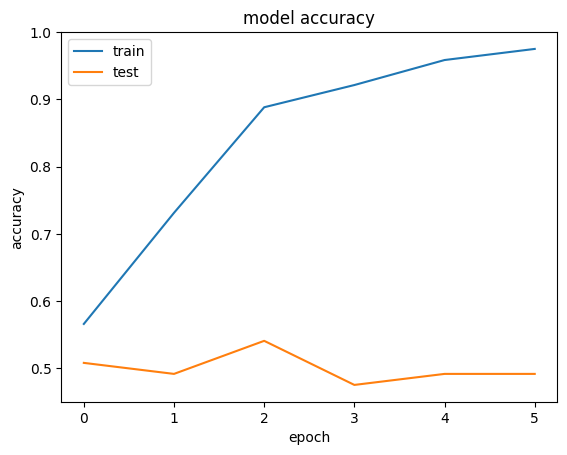

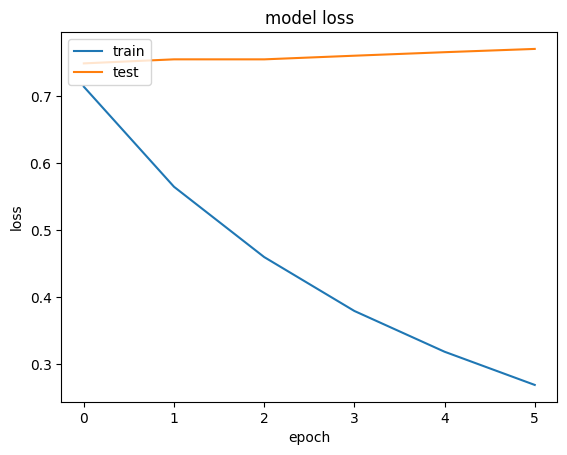

In [47]:
import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [48]:
from keras.layers import Conv1D

In [49]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [50]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          441100    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 505357 (1.93 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 441100 (1.68 MB)
_________________________________________________________________
None


In [64]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 0s 157ms/step - loss: 0.3976 - acc: 0.9959 - val_loss: 0.6752 - val_acc: 0.5410
Epoch 2/15
2/2 [==============================] - 0s 111ms/step - loss: 0.3656 - acc: 1.0000 - val_loss: 0.6703 - val_acc: 0.5902
Epoch 3/15
2/2 [==============================] - 0s 117ms/step - loss: 0.3327 - acc: 1.0000 - val_loss: 0.6734 - val_acc: 0.5902
Epoch 4/15
2/2 [==============================] - 0s 118ms/step - loss: 0.3090 - acc: 1.0000 - val_loss: 0.6747 - val_acc: 0.5902
Epoch 5/15
2/2 [==============================] - 0s 108ms/step - loss: 0.2867 - acc: 1.0000 - val_loss: 0.6697 - val_acc: 0.5902
Epoch 6/15
2/2 [==============================] - 0s 107ms/step - loss: 0.2645 - acc: 1.0000 - val_loss: 0.6654 - val_acc: 0.6393
Epoch 7/15
2/2 [==============================] - 0s 115ms/step - loss: 0.2457 - acc: 1.0000 - val_loss: 0.6640 - val_acc: 0.5902
Epoch 8/15
2/2 [==============================] - 0s 108ms/step - loss: 0.2298 - acc: 1.00

In [65]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)

3/3 [==============================] - 0s 9ms/step - loss: 0.7152 - acc: 0.4868


In [66]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.7152092456817627
Test Accuracy: 0.4868420958518982


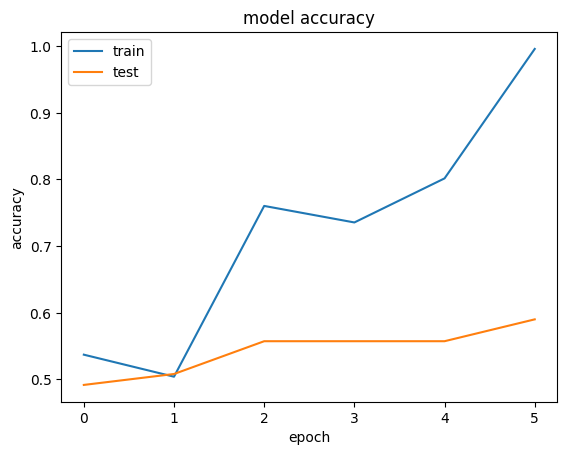

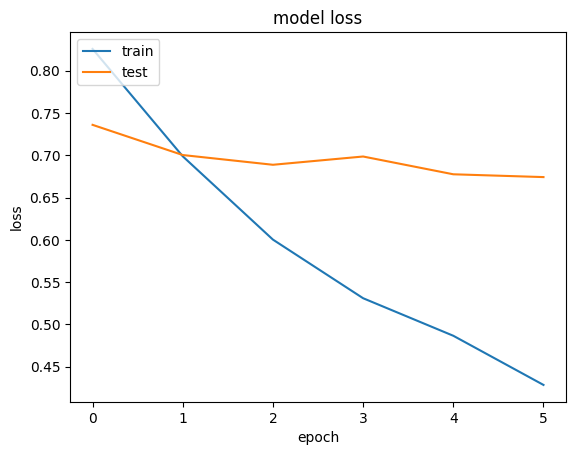

In [54]:
import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [55]:

from keras.layers import LSTM

In [56]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [57]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          441100    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 558477 (2.13 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 441100 (1.68 MB)
_________________________________________________________________
None


In [62]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 1s 369ms/step - loss: 0.4401 - acc: 0.7397 - val_loss: 0.8697 - val_acc: 0.4590
Epoch 2/15
2/2 [==============================] - 1s 307ms/step - loss: 0.4314 - acc: 0.7727 - val_loss: 0.9344 - val_acc: 0.4590
Epoch 3/15
2/2 [==============================] - 1s 314ms/step - loss: 0.4153 - acc: 0.7769 - val_loss: 1.0329 - val_acc: 0.4590
Epoch 4/15
2/2 [==============================] - 1s 382ms/step - loss: 0.4225 - acc: 0.7521 - val_loss: 1.0524 - val_acc: 0.4918
Epoch 5/15
2/2 [==============================] - 1s 294ms/step - loss: 0.3805 - acc: 0.7975 - val_loss: 1.0621 - val_acc: 0.4754
Epoch 6/15
2/2 [==============================] - 1s 305ms/step - loss: 0.3654 - acc: 0.8017 - val_loss: 1.1108 - val_acc: 0.4918
Epoch 7/15
2/2 [==============================] - 1s 306ms/step - loss: 0.3375 - acc: 0.8182 - val_loss: 1.1571 - val_acc: 0.5246
Epoch 8/15
2/2 [==============================] - 1s 300ms/step - loss: 0.3224 - acc: 0.84

In [67]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)

3/3 [==============================] - 0s 36ms/step - loss: 1.3929 - acc: 0.5132


In [68]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.3928773403167725
Test Accuracy: 0.5131579041481018


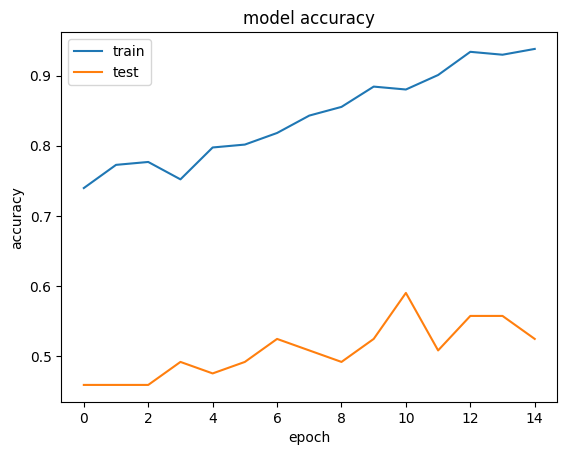

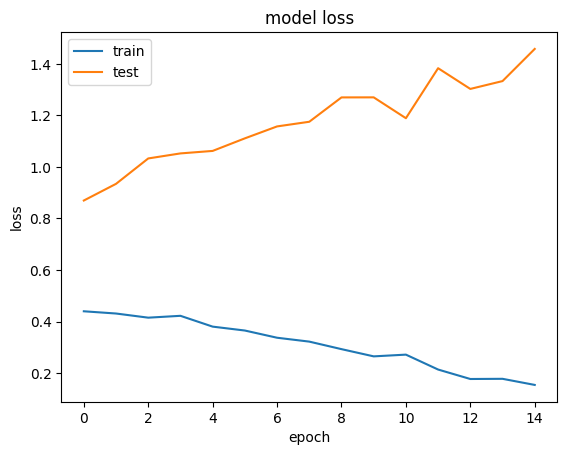

In [69]:
import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()